# Download dataset from shared link

In [82]:
!gdown 1ITHMMBXnPR4hS4jfW07xBSSgSTNU1zrU # Download MAC_derand_lecture-dataset.zip dataset form goole drive
!gdown 18HlDcQVtwzDGfHz0aKUGwZsiwd61SC8A # Download MAC_derand_challenge-dataset.zip dataset form goole drive

Downloading...
From: https://drive.google.com/uc?id=1ITHMMBXnPR4hS4jfW07xBSSgSTNU1zrU
To: /content/MAC_derand_lecture-dataset.zip
100% 53.1k/53.1k [00:00<00:00, 76.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=18HlDcQVtwzDGfHz0aKUGwZsiwd61SC8A
To: /content/MAC_derand_challenge-dataset.zip
100% 82.6k/82.6k [00:00<00:00, 64.3MB/s]


# Unzip dataset

In [85]:
! unzip -qq '/content/MAC_derand_lecture-dataset.zip'
! unzip -qq '/content/MAC_derand_challenge-dataset.zip'

replace __MACOSX/._challenge-dataset? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Import libraries

In [73]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
import itertools
from sklearn.metrics import homogeneity_completeness_v_measure
import random


# Read all csv files and combine them into one

In [4]:
base_dir = '/content/lecture-dataset/'

df_list = list()

for root, dirs, files in os.walk(base_dir):
  for file in files:
    if file.endswith(".csv"):
      file_path = os.path.join(root,file)

      df = pd.read_csv(file_path)
      df_list.append(df)

raw_dataset = pd.concat(df_list, ignore_index=True)

raw_dataset['Timestamp']=pd.to_datetime(raw_dataset['Timestamp'], unit='s')

display(raw_dataset)



,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,2023-10-12 13:13:58.530533120,08:8c:3f:25:64:de,6,6.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11-C_a
1,2023-10-12 13:13:58.576313088,06:ac:28:5b:d9:63,1,1.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11-C_a
2,2023-10-12 13:13:58.486882048,f7:95:30:e5:7c:3e,11,11.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11-C_a
3,2023-10-12 13:13:58.550159872,08:8c:3f:25:64:de,6,6.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11-C_a
4,2023-10-12 13:13:58.618285824,c6:30:ee:18:34:a8,6,5.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000fdfffdff39...,132,iPhone11-C_a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,2023-05-20 13:48:50.284313088,c2:36:7b:35:f4:a5,6,6.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
4984,2023-05-20 13:48:50.494008064,c2:36:7b:35:f4:a5,11,11.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
4985,2023-05-20 13:48:50.514439936,c2:36:7b:35:f4:a5,11,11.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,NaN,82848b96,0c1218243048606c,NaN,020014,193,S21Ultra-M_a
4986,2023-05-20 13:49:40.855052032,f6:e8:46:ec:d1:90,6,6.0,2d001bffff000000000000000000000000000000000000...,8.000000e+10,NaN,NaN,82848b96,0c1218243048606c,NaN,23010808180080203002000d009f08000000f5fff5ff39...,132,S21Ultra-M_a


# EDA part

## dataset info

In [5]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4988 entries, 0 to 4987
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Timestamp                 4988 non-null   datetime64[ns]
 1   MAC Address               4988 non-null   object        
 2   Channel                   4988 non-null   int64         
 3   DS Channel                4959 non-null   float64       
 4   HT Capabilities           4987 non-null   object        
 5   Extended Capabilities     4987 non-null   float64       
 6   Vendor Specific Tags      4045 non-null   object        
 7   SSID                      427 non-null    object        
 8   Supported Rates           4988 non-null   object        
 9   Extended Supported Rates  4987 non-null   object        
 10  VHT Capabilities          0 non-null      float64       
 11  HE Capabilities           933 non-null    object        
 12  Length              

## Remove columns with nan values more than 60 % of total

In [6]:
nan_sum = raw_dataset.isna().sum()
print('The following part dentoes the number of nan values in each column')
print('='*80)
print(nan_sum)

The following part dentoes the number of nan values in each column
Timestamp                      0
MAC Address                    0
Channel                        0
DS Channel                    29
HT Capabilities                1
Extended Capabilities          1
Vendor Specific Tags         943
SSID                        4561
Supported Rates                0
Extended Supported Rates       1
VHT Capabilities            4988
HE Capabilities             4055
Length                         0
Label                          0
dtype: int64


In [7]:
# Calculate how much percent for ecach
nan_percentage = (nan_sum/len(raw_dataset))*100
print('The following part is showing the percentage of nan values in each column')
print('='*80)
print(nan_percentage)

The following part is showing the percentage of nan values in each column
Timestamp                     0.000000
MAC Address                   0.000000
Channel                       0.000000
DS Channel                    0.581395
HT Capabilities               0.020048
Extended Capabilities         0.020048
Vendor Specific Tags         18.905373
SSID                         91.439455
Supported Rates               0.000000
Extended Supported Rates      0.020048
VHT Capabilities            100.000000
HE Capabilities              81.295108
Length                        0.000000
Label                         0.000000
dtype: float64


In [8]:
# remove them
col_drop = []

for i in range(0,len(nan_percentage)):
  if nan_percentage[i] > 60:
    col_drop.append(nan_percentage.index[i])
print('The following columns has been deleted from dataset since they had more than 60% nan values inside themselves')
print('='*110)
print('\t\t\t',col_drop)
print('\nNow dataset is like this:')

clean_df = raw_dataset.drop(col_drop, axis=1)
display(clean_df)

The following columns has been deleted from dataset since they had more than 60% nan values inside themselves
			 ['SSID', 'VHT Capabilities', 'HE Capabilities']

Now dataset is like this:


,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,2023-10-12 13:13:58.530533120,08:8c:3f:25:64:de,6,6.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,82848b96,0c1218243048606c,132,iPhone11-C_a
1,2023-10-12 13:13:58.576313088,06:ac:28:5b:d9:63,1,1.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,82848b96,0c1218243048606c,132,iPhone11-C_a
2,2023-10-12 13:13:58.486882048,f7:95:30:e5:7c:3e,11,11.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,82848b96,0c1218243048606c,132,iPhone11-C_a
3,2023-10-12 13:13:58.550159872,08:8c:3f:25:64:de,6,6.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,82848b96,0c1218243048606c,132,iPhone11-C_a
4,2023-10-12 13:13:58.618285824,c6:30:ee:18:34:a8,6,5.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,82848b96,0c1218243048606c,132,iPhone11-C_a
...,...,...,...,...,...,...,...,...,...,...,...
4983,2023-05-20 13:48:50.284313088,c2:36:7b:35:f4:a5,6,6.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,82848b96,0c1218243048606c,193,S21Ultra-M_a
4984,2023-05-20 13:48:50.494008064,c2:36:7b:35:f4:a5,11,11.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,82848b96,0c1218243048606c,193,S21Ultra-M_a
4985,2023-05-20 13:48:50.514439936,c2:36:7b:35:f4:a5,11,11.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,82848b96,0c1218243048606c,193,S21Ultra-M_a
4986,2023-05-20 13:49:40.855052032,f6:e8:46:ec:d1:90,6,6.0,2d001bffff000000000000000000000000000000000000...,8.000000e+10,NaN,82848b96,0c1218243048606c,132,S21Ultra-M_a


## Choose columns with maximum 20 unique values and call them features

In [9]:
unique_elem = clean_df.nunique()

print(unique_elem)

features = []

for i in range(0,len(unique_elem)-1):
  if unique_elem[i] < 20:
    features.append(unique_elem.index[i])
print('='*80)
print('We have selected the folliwing columns as our features:')
print(features,'\n')


Timestamp                   4988
MAC Address                  718
Channel                        3
DS Channel                    13
HT Capabilities                8
Extended Capabilities          7
Vendor Specific Tags           5
Supported Rates                4
Extended Supported Rates       2
Length                        16
Label                          7
dtype: int64
We have selected the folliwing columns as our features:
['Channel', 'DS Channel', 'HT Capabilities', 'Extended Capabilities', 'Vendor Specific Tags', 'Supported Rates', 'Extended Supported Rates', 'Length'] 



In [10]:
display(clean_df[features])

,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length
0,6,6.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,82848b96,0c1218243048606c,132
1,1,1.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,82848b96,0c1218243048606c,132
2,11,11.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,82848b96,0c1218243048606c,132
3,6,6.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,82848b96,0c1218243048606c,132
4,6,5.0,2d401bff00000000000000000000000000000000000000...,8.040000e+10,NaN,82848b96,0c1218243048606c,132
...,...,...,...,...,...,...,...,...
4983,6,6.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,82848b96,0c1218243048606c,193
4984,11,11.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,82848b96,0c1218243048606c,193
4985,11,11.0,2d001bffff000000000000000000000000000000000000...,4.004880e+18,00904c0408bf0c7678910ffaff0000faff0020,82848b96,0c1218243048606c,193
4986,6,6.0,2d001bffff000000000000000000000000000000000000...,8.000000e+10,NaN,82848b96,0c1218243048606c,132


## Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

# label encoding on some columns except 'Length, Channel, DS Channel'

def encoder(df,features):
  df_tmp = df.copy()
  for elem in features:
    if elem != 'Lenght' and elem != 'Channel' and elem != 'DS Channel':
      label_encoder = LabelEncoder()
      df_tmp[elem] = label_encoder.fit_transform(df_tmp[elem].astype(str))

  # encode Label for correlation matrxi

  df_tmp[features]=df_tmp[features].astype(float)
  return df_tmp

encoded_df = encoder(clean_df,features)
display(encoded_df)

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,2023-10-12 13:13:58.530533120,08:8c:3f:25:64:de,6.0,6.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
1,2023-10-12 13:13:58.576313088,06:ac:28:5b:d9:63,1.0,1.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
2,2023-10-12 13:13:58.486882048,f7:95:30:e5:7c:3e,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
3,2023-10-12 13:13:58.550159872,08:8c:3f:25:64:de,6.0,6.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
4,2023-10-12 13:13:58.618285824,c6:30:ee:18:34:a8,6.0,5.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
...,...,...,...,...,...,...,...,...,...,...,...
4983,2023-05-20 13:48:50.284313088,c2:36:7b:35:f4:a5,6.0,6.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
4984,2023-05-20 13:48:50.494008064,c2:36:7b:35:f4:a5,11.0,11.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
4985,2023-05-20 13:48:50.514439936,c2:36:7b:35:f4:a5,11.0,11.0,4.0,1.0,4.0,1.0,0.0,12.0,S21Ultra-M_a
4986,2023-05-20 13:49:40.855052032,f6:e8:46:ec:d1:90,6.0,6.0,4.0,3.0,5.0,1.0,0.0,5.0,S21Ultra-M_a


## Remove timestamp column

In [12]:
burst_df = encoded_df.drop(['Timestamp'],axis=1) # We don't need timestamp anymore

# Groupby Mac Address

In [13]:
# see unique mac addresses
unique_mac_addresses = len(np.unique(burst_df['MAC Address']))
print(f'We have: {unique_mac_addresses} unique Mac addresses')
print('='*80)
burst_df = burst_df.groupby(['MAC Address']) # Group by Mac Address
burst_df = burst_df.first().reset_index() # Show first row of groupd mac address
display(burst_df)

We have: 718 unique Mac addresses


,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,00:0f:00:6a:68:8b,1.0,NaN,8.0,7.0,5.0,3.0,2.0,15.0,SamsungJ6_K
1,00:78:b5:8a:40:84,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
2,00:c6:7e:33:8c:62,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
3,00:cb:d6:50:04:2c,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
4,01:31:03:f5:11:4b,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
...,...,...,...,...,...,...,...,...,...,...
713,fe:7b:b8:60:08:c7,11.0,13.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
714,fe:9d:55:a5:9f:4a,1.0,1.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W
715,fe:d8:06:8a:6a:09,1.0,1.0,3.0,3.0,5.0,0.0,0.0,2.0,iPhoneXR-U
716,fe:f9:fc:fb:83:9e,6.0,6.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N


# Feature Selection

## Correlation matrix

In [14]:
display(burst_df)

,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,00:0f:00:6a:68:8b,1.0,NaN,8.0,7.0,5.0,3.0,2.0,15.0,SamsungJ6_K
1,00:78:b5:8a:40:84,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
2,00:c6:7e:33:8c:62,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
3,00:cb:d6:50:04:2c,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
4,01:31:03:f5:11:4b,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
...,...,...,...,...,...,...,...,...,...,...
713,fe:7b:b8:60:08:c7,11.0,13.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
714,fe:9d:55:a5:9f:4a,1.0,1.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W
715,fe:d8:06:8a:6a:09,1.0,1.0,3.0,3.0,5.0,0.0,0.0,2.0,iPhoneXR-U
716,fe:f9:fc:fb:83:9e,6.0,6.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N


In [15]:
label_encoder = LabelEncoder() # Let's encode Mac and Label columns to see correlation matrix
burst_df1 = burst_df[features].copy()
burst_df1['MAC Address'] = label_encoder.fit_transform(burst_df['MAC Address'].astype(str))
burst_df1['Label'] = label_encoder.fit_transform(burst_df['Label'].astype(str))
display(burst_df1)

,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,MAC Address,Label
0,1.0,NaN,8.0,7.0,5.0,3.0,2.0,15.0,0,2
1,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,1,3
2,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,2,3
3,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,3,3
4,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,4,3
...,...,...,...,...,...,...,...,...,...,...
713,11.0,13.0,6.0,5.0,5.0,1.0,0.0,5.0,713,3
714,1.0,1.0,6.0,5.0,5.0,1.0,0.0,6.0,714,4
715,1.0,1.0,3.0,3.0,5.0,0.0,0.0,2.0,715,6
716,6.0,6.0,2.0,2.0,1.0,0.0,0.0,9.0,716,5


These features have the mose effect on label based on the following graph:
 ['HT Capabilities','DS Channel', 'Channel','Vendor Specific Tags']


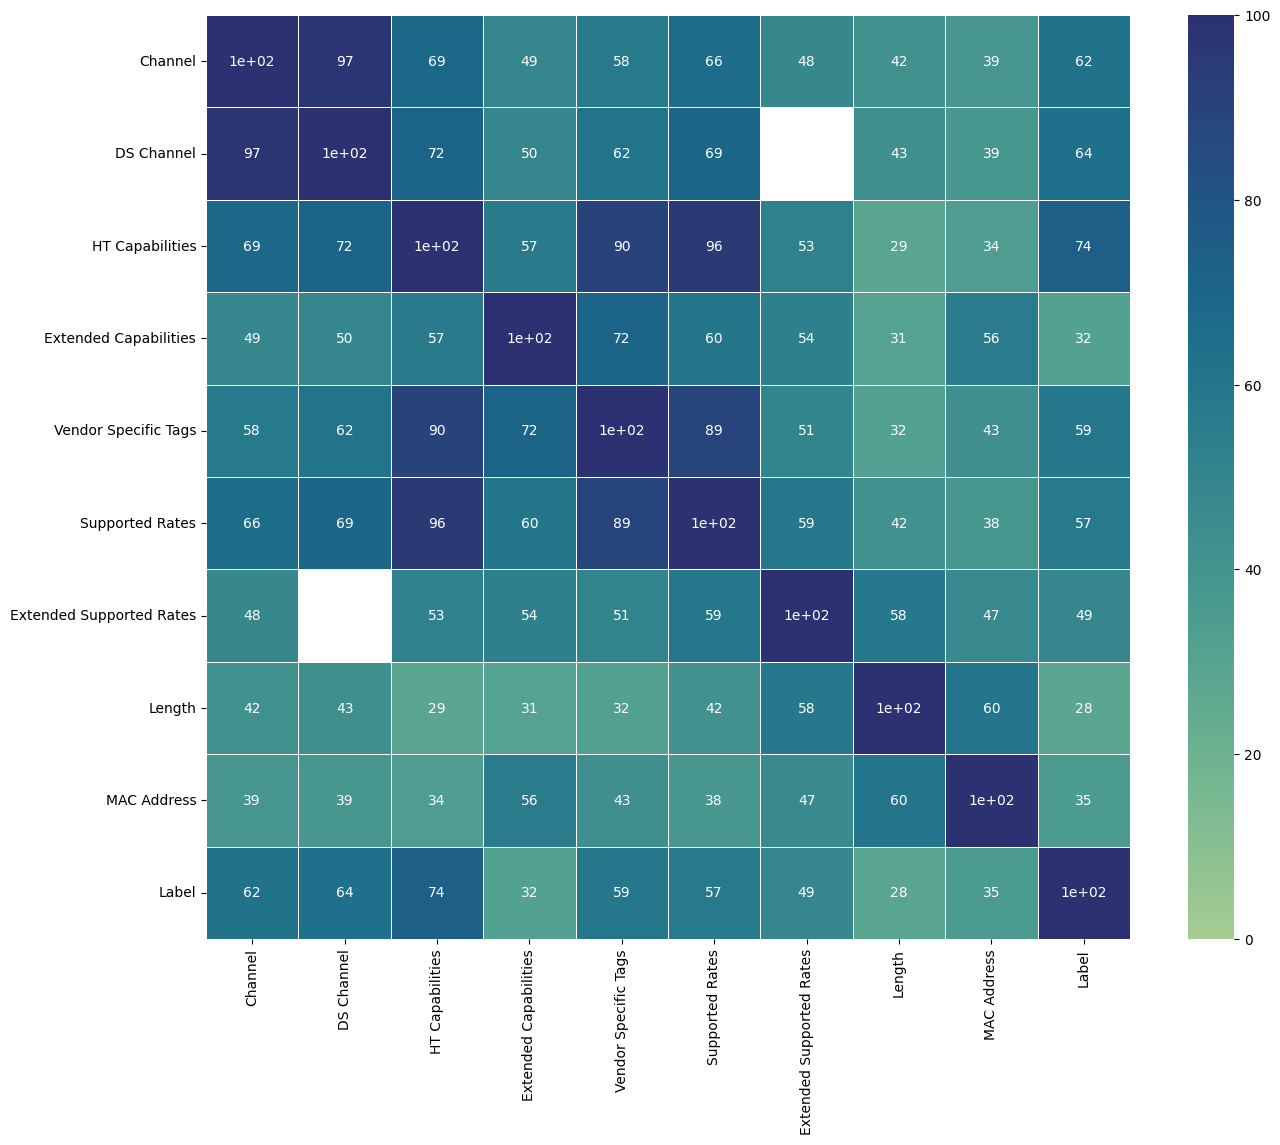

In [16]:
# We need to know the effect of fetures on each other and on traget
f, ax = plt.subplots(figsize=(15, 12))
corr = burst_df1.corr()
sns.heatmap(((corr + 1) * 50),annot=True,linewidth=.5,
            cmap='crest',
            square=True, ax=ax, vmin=0, vmax=100)

print('These features have the mose effect on label based on the following graph:')
print(" ['HT Capabilities','DS Channel', 'Channel','Vendor Specific Tags']")
print('='*80)

## Mutual Info/Gain Entropy

In [17]:
x_train =burst_df[features].copy()
y_train =burst_df['Label'].copy()

#For mutula info all items must be value not nan parameters. SO:
x_train['DS Channel'].fillna(value=1.0, inplace=True)

In [18]:
print('Here you can see the effect of each feature on Lable column:')
print('='*80)
mutual_info = mutual_info_classif(x_train,y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)


Here you can see the effect of each feature on Lable column:


Length                      1.529222
HT Capabilities             1.121224
Extended Capabilities       1.013777
Vendor Specific Tags        0.923106
Supported Rates             0.582983
DS Channel                  0.399432
Channel                     0.181729
Extended Supported Rates    0.023376
dtype: float64

## Cross Tab

In [19]:
def plot_heatmap(df, column1, column2, colormap="Blues"):
   crosstab = pd.crosstab(df[column1], df[column2])

   sns.set_theme(style="whitegrid",font_scale=1)
   plt.figure(figsize=(15,10))

   sns.heatmap(crosstab,annot=True, fmt="d", cmap=colormap)

   plt.title(f"Heatmap of {column1} vs {column2}")
   plt.xlabel(column2)
   plt.ylabel(column1)

   plt.show()






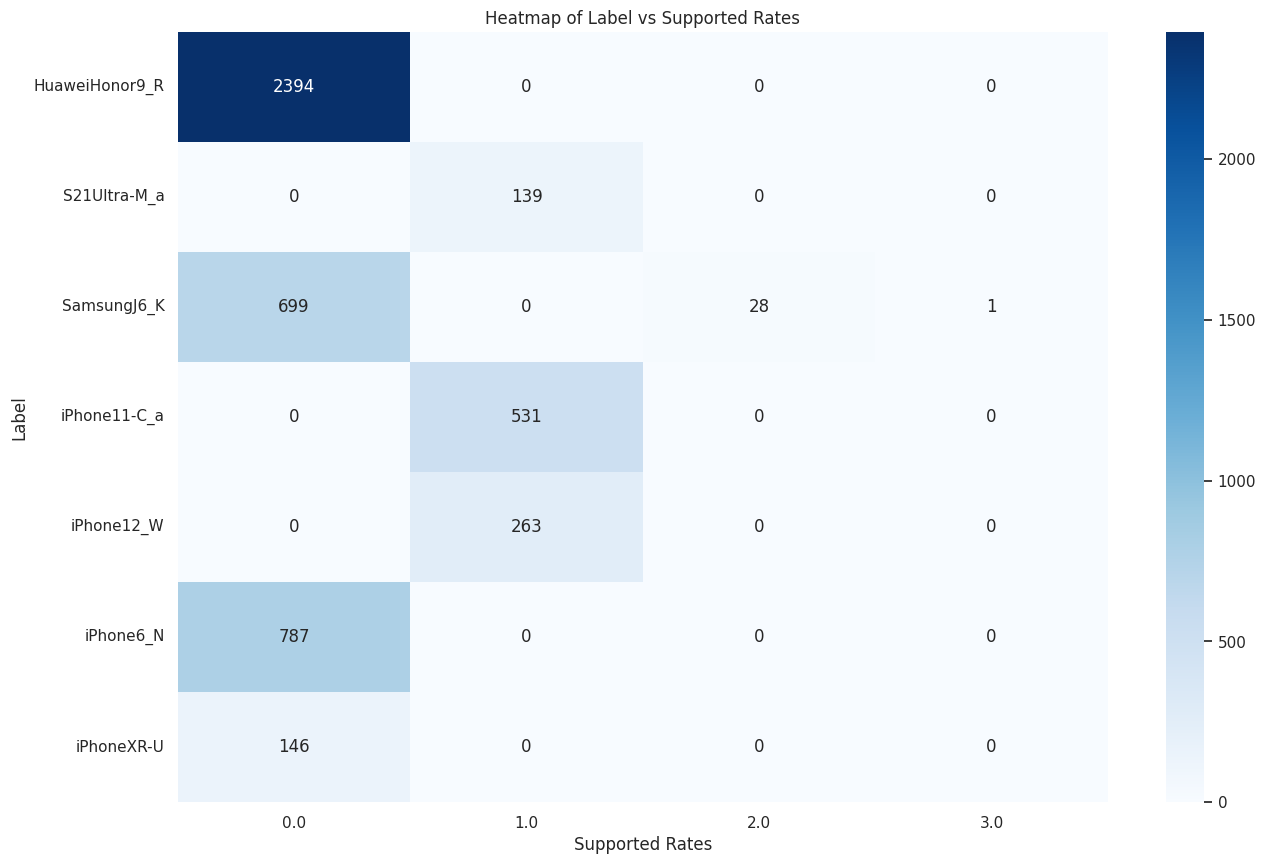

In [20]:
# In the following codes, you see the correlations of columns with each other
plot_heatmap(encoded_df,'Label',"Supported Rates")

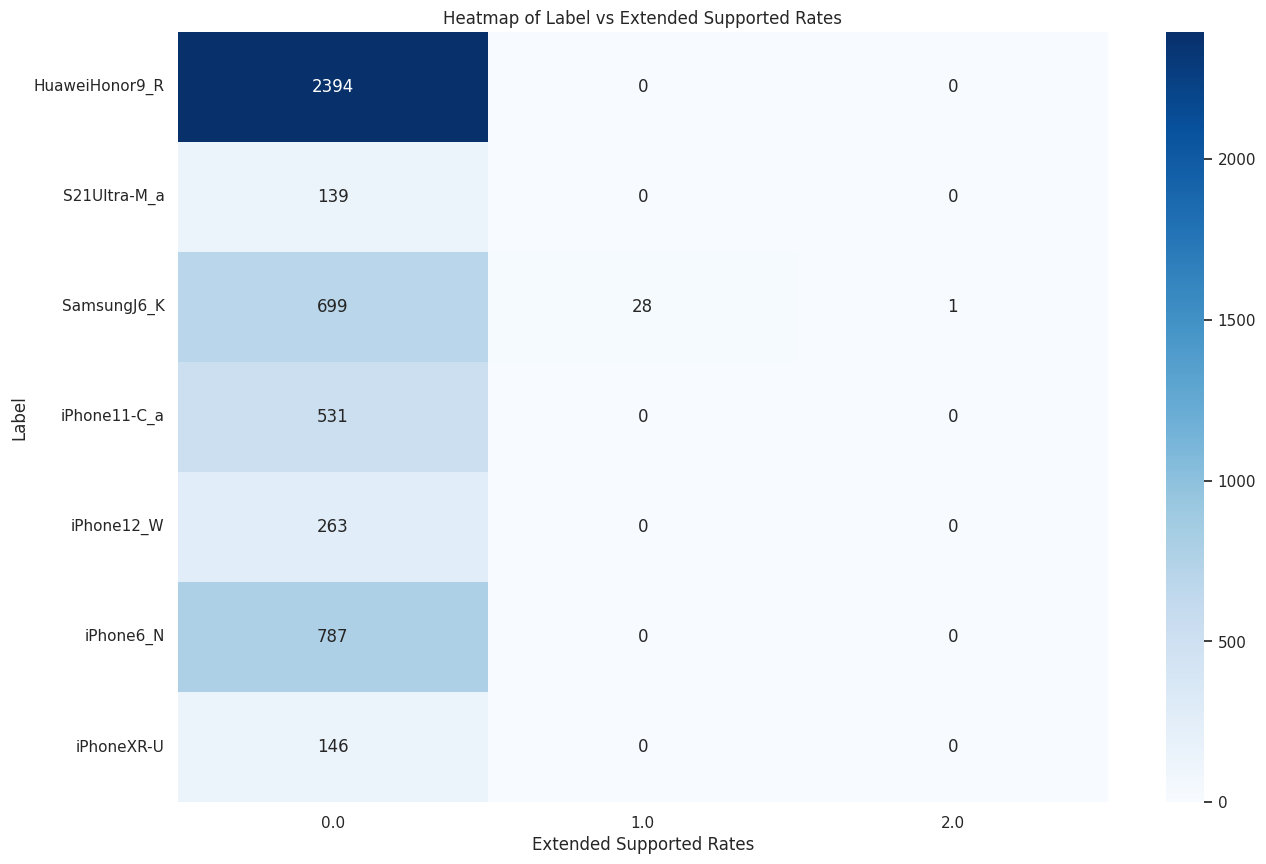

In [21]:
plot_heatmap(encoded_df,'Label',"Extended Supported Rates")

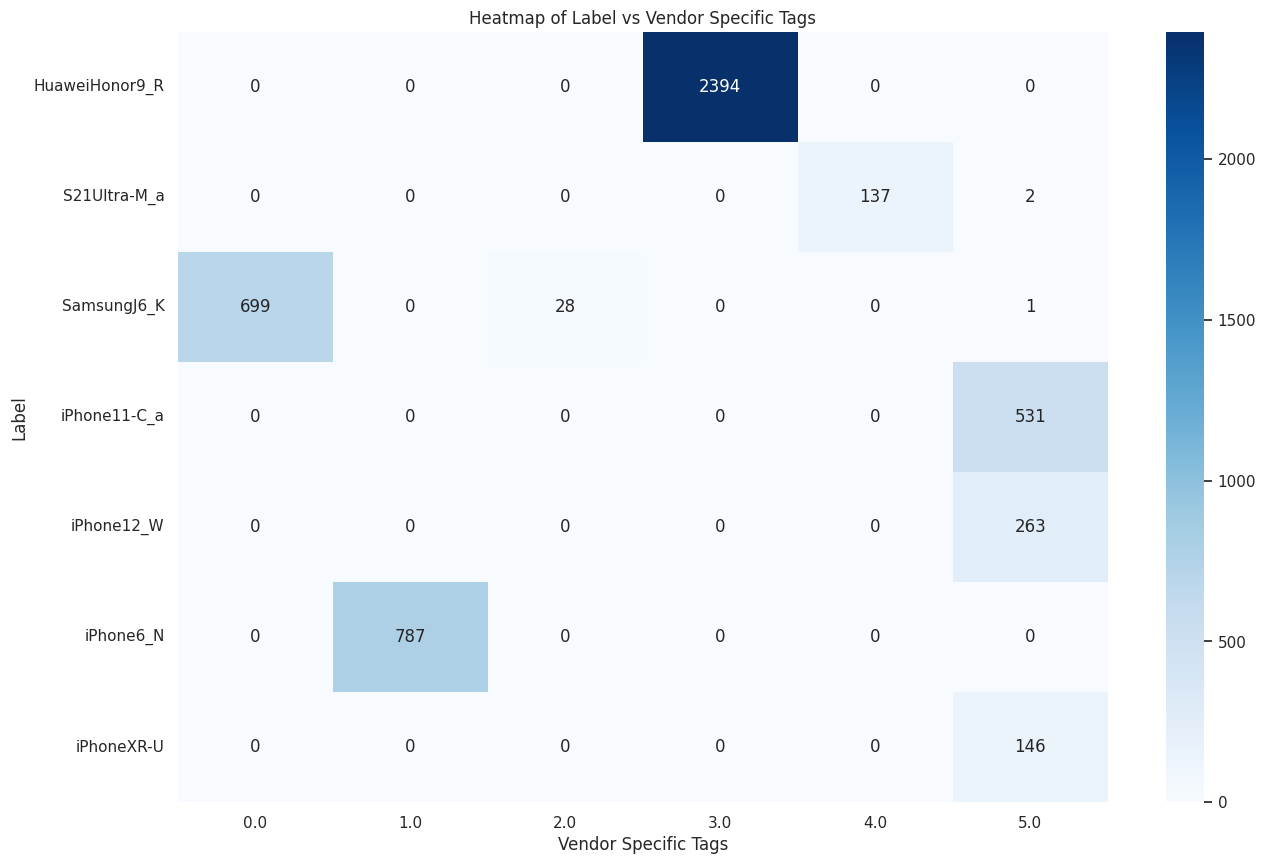

In [22]:
plot_heatmap(encoded_df,'Label',"Vendor Specific Tags")

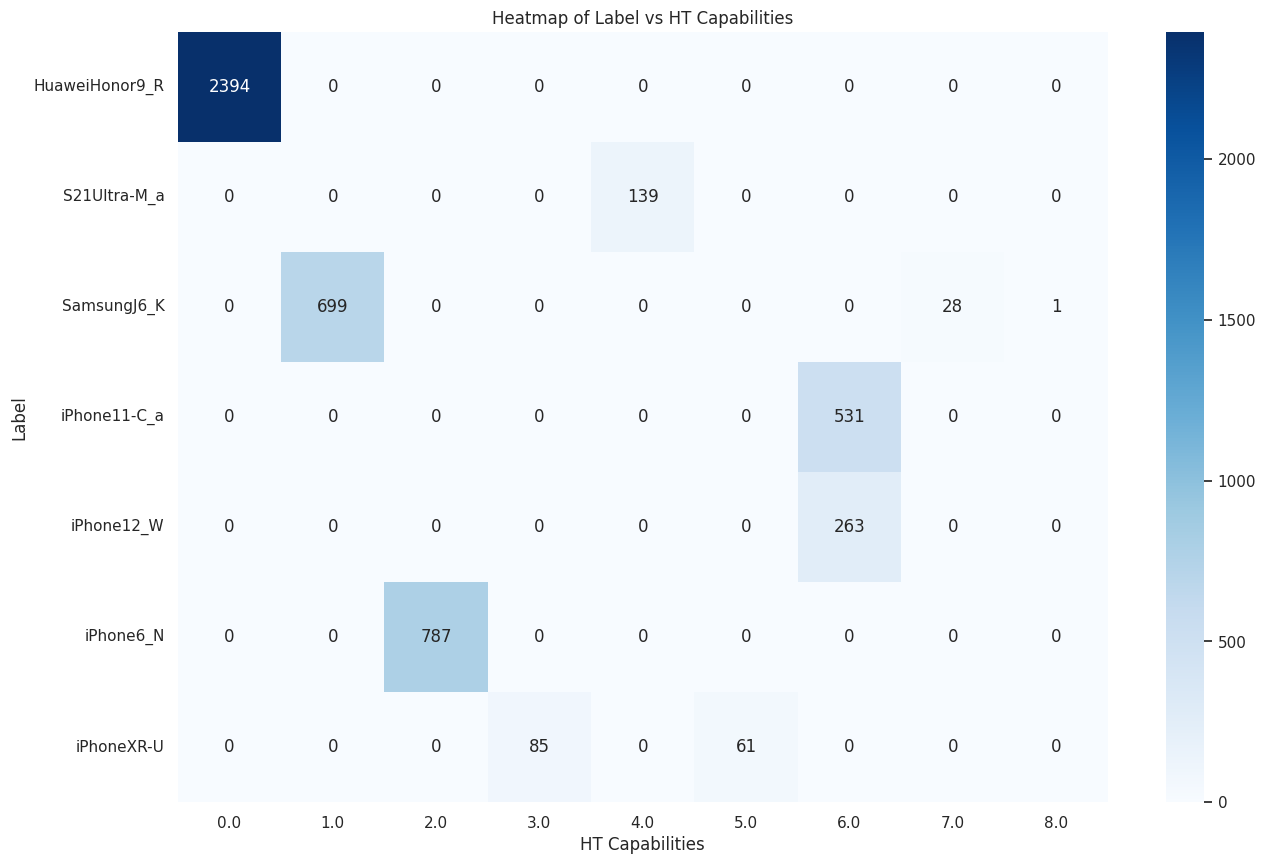

In [23]:
plot_heatmap(encoded_df,'Label',"HT Capabilities")

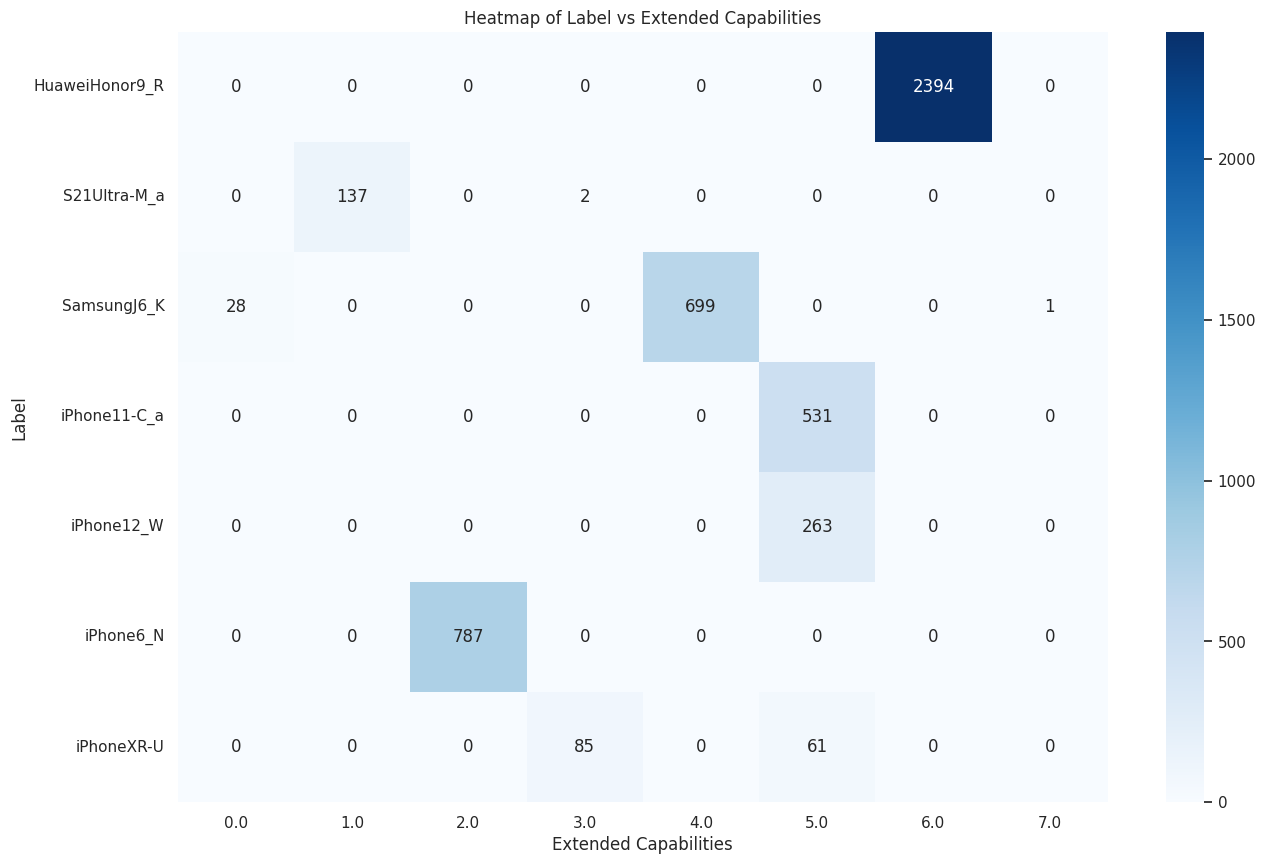

In [24]:
plot_heatmap(encoded_df,'Label',"Extended Capabilities")

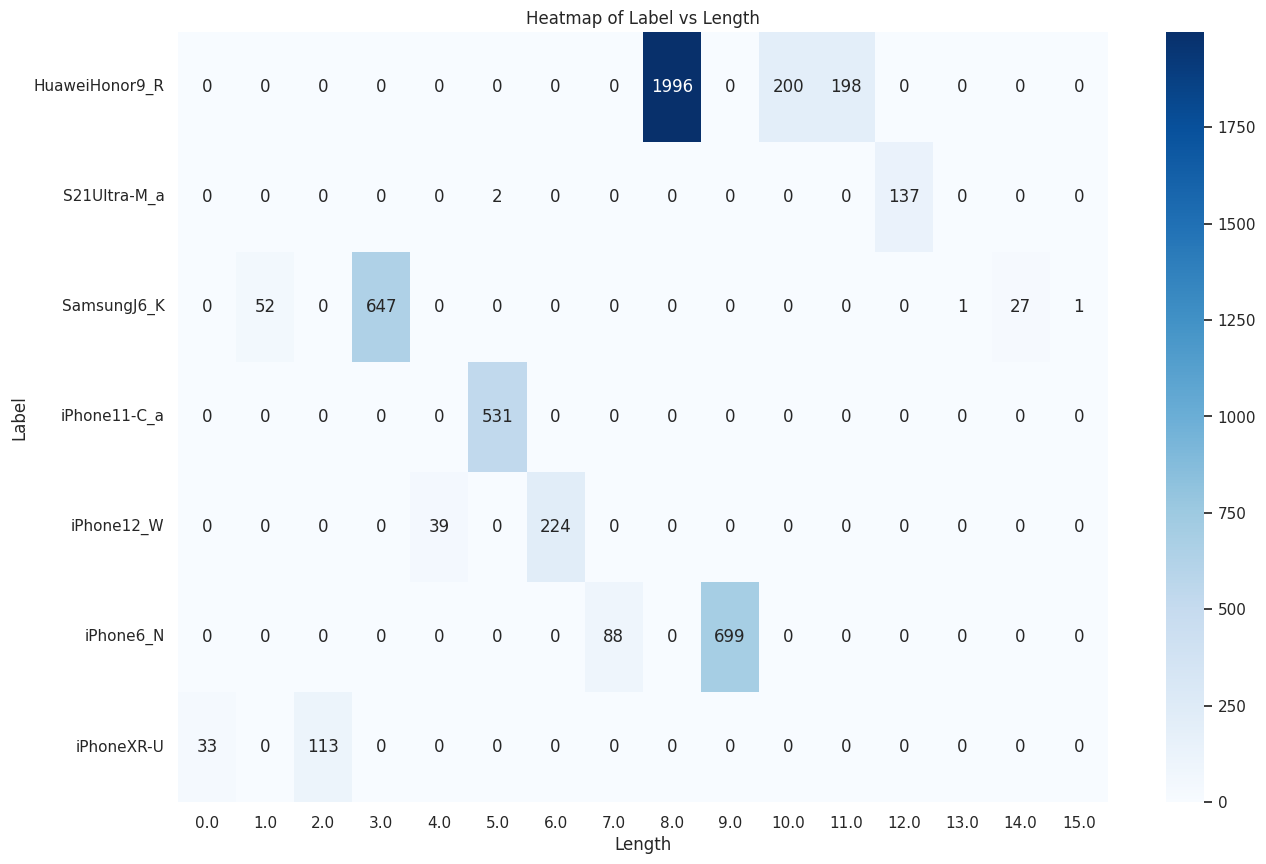

In [25]:
plot_heatmap(encoded_df,'Label',"Length")

## Recommended features!!

In [26]:
dictionary = {'Correlation Matrix':['HT Capabilities','DS Channel', 'Channel','Vendor Specific Tags'],
              'Mutual Info':['Length','HT Capabilities','Extended Capabilities','Vendor Specific Tags'],
              'Cross Tab':['HT Capabilities','Extended Capabilities','Lenght','nan']}
recommended_features_df = pd.DataFrame(dictionary)
print('Here you can see the recommendations for features of different methods')
print('='*80)
display(recommended_features_df)

Here you can see the recommendations for features of different methods


,Correlation Matrix,Mutual Info,Cross Tab
0,HT Capabilities,Length,HT Capabilities
1,DS Channel,HT Capabilities,Extended Capabilities
2,Channel,Extended Capabilities,Lenght
3,Vendor Specific Tags,Vendor Specific Tags,nan


# Simple Clustering

## select features


In [35]:
columns_to_keep = features.copy()
columns_to_keep.insert(0,"MAC Address")
columns_to_keep.append("Label")
cluster_df = burst_df[columns_to_keep].copy().reset_index()
cluster_df['DS Channel'].fillna(value=1.0, inplace=True)
display(cluster_df)

,index,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,0,00:0f:00:6a:68:8b,1.0,1.0,8.0,7.0,5.0,3.0,2.0,15.0,SamsungJ6_K
1,1,00:78:b5:8a:40:84,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
2,2,00:c6:7e:33:8c:62,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
3,3,00:cb:d6:50:04:2c,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
4,4,01:31:03:f5:11:4b,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
...,...,...,...,...,...,...,...,...,...,...,...
713,713,fe:7b:b8:60:08:c7,11.0,13.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a
714,714,fe:9d:55:a5:9f:4a,1.0,1.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W
715,715,fe:d8:06:8a:6a:09,1.0,1.0,3.0,3.0,5.0,0.0,0.0,2.0,iPhoneXR-U
716,716,fe:f9:fc:fb:83:9e,6.0,6.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N


In [36]:
combinations = []

for r in range(1, len(features)+1):
    combinations.extend(itertools.combinations(features, r))



In [46]:
table = pd.DataFrame({},index=['h','c','v'])
table

""
h
c
v


In [ ]:
new_cluster_df = cluster_df.copy()
for index,item in enumerate(combinations):
  selected_features = list(item)
  new_cluster_df[f"Cluster_{index}"]=new_cluster_df.groupby(selected_features).ngroup() # Group by seleceted features and give them a number
  result = homogeneity_completeness_v_measure(new_cluster_df["Label"],new_cluster_df[f"Cluster_{index}"])
  result = np.reshape(result,(3,1))
  table[f'Cluster_{index}'] = result




In [48]:
table

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_245,Cluster_246,Cluster_247,Cluster_248,Cluster_249,Cluster_250,Cluster_251,Cluster_252,Cluster_253,Cluster_254
h,0.138779,0.279538,0.732336,0.664772,0.601125,0.393349,0.002982,0.993841,0.294904,0.744822,...,1.000000,0.772558,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
c,0.201420,0.199372,0.965429,0.956649,0.987244,0.990266,0.435426,0.918410,0.205508,0.565175,...,0.900375,0.398899,0.462071,0.462071,0.462071,0.462071,0.462071,0.635206,0.465102,0.462071
v,0.164332,0.232745,0.832881,0.784440,0.747253,0.563047,0.005924,0.954638,0.242221,0.642680,...,0.947576,0.526135,0.632078,0.632078,0.632078,0.632078,0.632078,0.776913,0.634907,0.632078


In [49]:
table.idxmax(axis=1)

h    Cluster_46
c     Cluster_5
v     Cluster_7
dtype: object

In [54]:

# Get the indices of the 3 maximum values in each row
top_5_indices = table.apply(lambda row: row.nlargest(5).index.tolist(), axis=1)
print(top_5_indices)



h    [Cluster_46, Cluster_50, Cluster_61, Cluster_6...
c    [Cluster_5, Cluster_33, Cluster_30, Cluster_88...
v    [Cluster_7, Cluster_32, Cluster_34, Cluster_35...
dtype: object


In [65]:
top_5_indices[2]

['Cluster_7', 'Cluster_32', 'Cluster_34', 'Cluster_35', 'Cluster_89']

In [68]:
print(combinations[7],'--> cluster_7')
print(combinations[32],'--> cluster_32')
print(combinations[34],'--> cluster_34')
print(combinations[35],'--> cluster_35')
print(combinations[89],'--> cluster_89')
display(table[top_5_indices[2]])


('Length',) --> cluster_7
('Vendor Specific Tags', 'Length') --> cluster_32
('Supported Rates', 'Length') --> cluster_34
('Extended Supported Rates', 'Length') --> cluster_35
('Vendor Specific Tags', 'Supported Rates', 'Length') --> cluster_89


,Cluster_7,Cluster_32,Cluster_34,Cluster_35,Cluster_89
h,0.993841,0.993841,0.993841,0.993841,0.993841
c,0.918410,0.918410,0.918410,0.918410,0.918410
v,0.954638,0.954638,0.954638,0.954638,0.954638


In [72]:
selected_features = list(('Vendor Specific Tags', 'Supported Rates', 'Length'))
final_df = cluster_df.copy()
final_df['Cluster_ID'] =  final_df.groupby(selected_features).ngroup()
display(final_df)

,index,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label,Cluster_ID
0,0,00:0f:00:6a:68:8b,1.0,1.0,8.0,7.0,5.0,3.0,2.0,15.0,SamsungJ6_K,9
1,1,00:78:b5:8a:40:84,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,7
2,2,00:c6:7e:33:8c:62,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,7
3,3,00:cb:d6:50:04:2c,11.0,10.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,7
4,4,01:31:03:f5:11:4b,11.0,11.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,7
...,...,...,...,...,...,...,...,...,...,...,...,...
713,713,fe:7b:b8:60:08:c7,11.0,13.0,6.0,5.0,5.0,1.0,0.0,5.0,iPhone11-C_a,7
714,714,fe:9d:55:a5:9f:4a,1.0,1.0,6.0,5.0,5.0,1.0,0.0,6.0,iPhone12_W,8
715,715,fe:d8:06:8a:6a:09,1.0,1.0,3.0,3.0,5.0,0.0,0.0,2.0,iPhoneXR-U,5
716,716,fe:f9:fc:fb:83:9e,6.0,6.0,2.0,2.0,1.0,0.0,0.0,9.0,iPhone6_N,2


# Validation part

In [79]:
def prepare_validation_datasets(k):
  my_list = [1,2,3,4,5,6]
  if k != 6:
    random_numbers = random.sample(my_list, k)

    print(random_numbers)
  elif k==6:
    random_numbers = random.sample(my_list, k)




In [81]:
prepare_validation_datasets(3)

[6, 4, 1]


In [131]:
def load_validation_datasets(no_dataset_to_load):

  base_dir = '/content/challenge-dataset'

  df_list = list()


  for root, dirs, files in os.walk(base_dir):
    files = random.sample(files,no_dataset_to_load )
    #print(files)
    for file in enumerate(files):
      if file[1].endswith(".csv"):
        file_path = os.path.join(root,file[1])
        print(file_path)
        df = pd.read_csv(file_path)
        df_list.append(df)
        #value +=1


  raw_val_dataset = pd.concat(df_list, ignore_index=True)

  raw_val_dataset['Timestamp']=pd.to_datetime(raw_val_dataset['Timestamp'], unit='s')

  # display(raw_val_dataset)
  return raw_val_dataset



In [134]:
def create_5_val_dataset(k,dataset):
  if k !=6:
    os.mkdir(f"/content/K={k}")
    original_dataset = dataset.copy()
    num_rows_per_test = len(original_dataset) // 5  # Divide the original dataset into 5 equal parts

    # Shuffle the original dataset
    shuffled_dataset = original_dataset.sample(frac=1).reset_index(drop=True)

    # Create five test datasets
    test_datasets = []
    for i in range(5):
        start_idx = i * num_rows_per_test
        end_idx = (i + 1) * num_rows_per_test if i < 4 else None  # Handle the last part which might have fewer rows
        test_datasets.append(shuffled_dataset.iloc[start_idx:end_idx])

    # Optionally, you can save each test dataset to separate CSV files
    for i, test_data in enumerate(test_datasets):
        test_data.to_csv(f"/content/K={k}/test_dataset_{i + 1}.csv", index=False)

    original_dataset.to_csv(f"/content/K={k}/original_dataset.csv", index=False)

  elif k ==6:
    os.mkdir(f"/content/K={k}")
    original_dataset = dataset.copy()
    original_dataset.to_csv(f"/content/K={k}/test_dataset_1.csv", index=False)
    original_dataset.to_csv(f"/content/K={k}/original_dataset.csv", index=False)



In [135]:
for k in range(2,7):
  raw_val_dataset = load_validation_datasets(no_dataset_to_load= k)
  create_5_val_dataset(k= k, dataset = raw_val_dataset)

/content/challenge-dataset/XiaomiRedmiNote9S_T.csv
/content/challenge-dataset/GooglePixel3A_V.csv
/content/challenge-dataset/HuaweiHonor9_R.csv
/content/challenge-dataset/iPhone12_W.csv
/content/challenge-dataset/SamsungM31_A.csv
/content/challenge-dataset/SamsungS7_I.csv
/content/challenge-dataset/HuaweiHonor9_R.csv
/content/challenge-dataset/GooglePixel3A_V.csv
/content/challenge-dataset/SamsungM31_A.csv
/content/challenge-dataset/GooglePixel3A_V.csv
/content/challenge-dataset/XiaomiRedmiNote9S_T.csv
/content/challenge-dataset/iPhone12_W.csv
/content/challenge-dataset/SamsungS7_I.csv
/content/challenge-dataset/HuaweiHonor9_R.csv
/content/challenge-dataset/SamsungS7_I.csv
/content/challenge-dataset/SamsungM31_A.csv
/content/challenge-dataset/XiaomiRedmiNote9S_T.csv
/content/challenge-dataset/HuaweiHonor9_R.csv
/content/challenge-dataset/GooglePixel3A_V.csv
/content/challenge-dataset/iPhone12_W.csv


In [179]:
performance_table = pd.DataFrame({},index=['h','c','v'])
performance_table

""
h
c
v


In [186]:
for k in range(2,7):
  base_dir = f'/content/K={k}'
  df_list = list()

  for root, dirs, files in os.walk(base_dir):
    for file in enumerate(files):
      if file[1].endswith(".csv") and file[1].startswith('test'):
        file_path = os.path.join(root,file[1])
        val_df = pd.read_csv(file_path)

        # drop
        val_df.drop(['SSID', 'VHT Capabilities', 'HE Capabilities'],axis=1,inplace=True)
        encoded_df = encoder(val_df,features)
        encoded_df['Cluster_ID'] =  encoded_df.groupby(selected_features).ngroup()
        #display(encoded_df)
        #result = homogeneity_completeness_v_measure(encoded_df["Label"],encoded_df[f"Cluster_ID"])
        result = np.reshape(result,(3,1))
        number = int(file[1].split('_')[-1].split('.')[0])
        performance_table[f'K{k}_test{number}'] = result

performance_table

,K2_test4,K2_test3,K2_test2,K2_test5,K2_test1,K3_test4,K3_test3,K3_test2,K3_test5,K3_test1,...,K4_test3,K4_test2,K4_test5,K4_test1,K5_test4,K5_test3,K5_test2,K5_test5,K5_test1,K6_test1
h,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
c,0.750802,0.750802,0.750802,0.750802,0.750802,0.750802,0.750802,0.750802,0.750802,0.750802,...,0.750802,0.750802,0.750802,0.750802,0.750802,0.750802,0.750802,0.750802,0.750802,0.750802
v,0.857667,0.857667,0.857667,0.857667,0.857667,0.857667,0.857667,0.857667,0.857667,0.857667,...,0.857667,0.857667,0.857667,0.857667,0.857667,0.857667,0.857667,0.857667,0.857667,0.857667


In [ ]:
def performance(k):
  base_dir = '/content/challenge-dataset'

  df_list = list()


  for root, dirs, files in os.walk(base_dir):
    files = random.sample(files,no_dataset_to_load )
    #print(files)
    for file in enumerate(files):
      if file[1].endswith(".csv"):
        file_path = os.path.join(root,file[1])
        print(file_path)
        df = pd.read_csv(file_path)
        df_list.append(df)
        #value +=1


In [126]:
test1 = pd.read_csv('/content/test_dataset_1.csv')
test1

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,2021-05-21 11:27:59.804493056,02:00:00:00:00:00,1,3,2d0117ff00000000000000000000000000000000000000...,10008000000004080,0050f208001100,NaN,02040b160c121824,3048606c,NaN,NaN,123,SamsungM31_A
1,2021-07-20 10:00:36.451010048,1a:7a:3f:6f:32:0c,6,4,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,NaN,02040b16,0c1218243048606c,92f99133faff6203faff6203,02000b,165,XiaomiRedmiNote9S_T
2,2021-07-20 09:36:12.004079104,46:83:96:f1:53:22,11,11,ad0113ffff000000000000000000000000000000000000...,04000a82004000408001,0050f208002700,NaN,02040b16,0c1218243048606c,92f99133faff6203faff6203,02001f,143,XiaomiRedmiNote9S_T
3,2021-05-21 11:03:44.967407104,12:74:b7:d9:f1:10,1,3,2d0117ff00000000000000000000000000000000000000...,10008000000004080,0050f208001100,NaN,02040b160c121824,3048606c,NaN,NaN,123,SamsungM31_A
4,2021-05-21 11:34:36.321968128,02:00:00:00:00:00,11,9,2d0117ff00000000000000000000000000000000000000...,10008000000004080,0050f208001100,NaN,02040b160c121824,3048606c,NaN,NaN,123,SamsungM31_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,2021-07-20 09:58:50.337654016,96:44:77:b5:3b:09,11,1,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,NaN,02040b16,0c1218243048606c,92f99133faff6203faff6203,020009,153,XiaomiRedmiNote9S_T
377,2021-07-20 09:51:40.197026048,5a:6b:2c:9b:26:ec,6,9,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,NaN,02040b16,0c1218243048606c,92f99133faff6203faff6203,02000e,165,XiaomiRedmiNote9S_T
378,2021-07-20 09:57:20.861095936,d6:7a:cc:9b:d3:23,6,5,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,NaN,02040b16,0c1218243048606c,92f99133faff6203faff6203,02000a,165,XiaomiRedmiNote9S_T
379,2021-07-20 09:55:23.561584896,72:ef:64:ca:77:c3,11,11,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,NaN,02040b16,0c1218243048606c,92f99133faff6203faff6203,020009,153,XiaomiRedmiNote9S_T


In [139]:
test1.drop(['SSID', 'VHT Capabilities', 'HE Capabilities'],axis=1,inplace=True)
test1

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,2021-05-21 11:27:59.804493056,02:00:00:00:00:00,1,3,2d0117ff00000000000000000000000000000000000000...,10008000000004080,0050f208001100,02040b160c121824,3048606c,123,SamsungM31_A
1,2021-07-20 10:00:36.451010048,1a:7a:3f:6f:32:0c,6,4,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,02040b16,0c1218243048606c,165,XiaomiRedmiNote9S_T
2,2021-07-20 09:36:12.004079104,46:83:96:f1:53:22,11,11,ad0113ffff000000000000000000000000000000000000...,04000a82004000408001,0050f208002700,02040b16,0c1218243048606c,143,XiaomiRedmiNote9S_T
3,2021-05-21 11:03:44.967407104,12:74:b7:d9:f1:10,1,3,2d0117ff00000000000000000000000000000000000000...,10008000000004080,0050f208001100,02040b160c121824,3048606c,123,SamsungM31_A
4,2021-05-21 11:34:36.321968128,02:00:00:00:00:00,11,9,2d0117ff00000000000000000000000000000000000000...,10008000000004080,0050f208001100,02040b160c121824,3048606c,123,SamsungM31_A
...,...,...,...,...,...,...,...,...,...,...,...
376,2021-07-20 09:58:50.337654016,96:44:77:b5:3b:09,11,1,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,02040b16,0c1218243048606c,153,XiaomiRedmiNote9S_T
377,2021-07-20 09:51:40.197026048,5a:6b:2c:9b:26:ec,6,9,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,02040b16,0c1218243048606c,165,XiaomiRedmiNote9S_T
378,2021-07-20 09:57:20.861095936,d6:7a:cc:9b:d3:23,6,5,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,02040b16,0c1218243048606c,165,XiaomiRedmiNote9S_T
379,2021-07-20 09:55:23.561584896,72:ef:64:ca:77:c3,11,11,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,02040b16,0c1218243048606c,153,XiaomiRedmiNote9S_T


In [140]:
features

['Channel',
 'DS Channel',
 'HT Capabilities',
 'Extended Capabilities',
 'Vendor Specific Tags',
 'Supported Rates',
 'Extended Supported Rates',
 'Length']

In [141]:
encoded_test1_df = encoder(test1,features)
display(encoded_test1_df)

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,2021-05-21 11:27:59.804493056,02:00:00:00:00:00,1.0,3.0,0.0,2.0,0.0,1.0,1.0,1.0,SamsungM31_A
1,2021-07-20 10:00:36.451010048,1a:7a:3f:6f:32:0c,6.0,4.0,1.0,0.0,1.0,0.0,0.0,4.0,XiaomiRedmiNote9S_T
2,2021-07-20 09:36:12.004079104,46:83:96:f1:53:22,11.0,11.0,1.0,1.0,1.0,0.0,0.0,2.0,XiaomiRedmiNote9S_T
3,2021-05-21 11:03:44.967407104,12:74:b7:d9:f1:10,1.0,3.0,0.0,2.0,0.0,1.0,1.0,1.0,SamsungM31_A
4,2021-05-21 11:34:36.321968128,02:00:00:00:00:00,11.0,9.0,0.0,2.0,0.0,1.0,1.0,1.0,SamsungM31_A
...,...,...,...,...,...,...,...,...,...,...,...
376,2021-07-20 09:58:50.337654016,96:44:77:b5:3b:09,11.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,XiaomiRedmiNote9S_T
377,2021-07-20 09:51:40.197026048,5a:6b:2c:9b:26:ec,6.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,XiaomiRedmiNote9S_T
378,2021-07-20 09:57:20.861095936,d6:7a:cc:9b:d3:23,6.0,5.0,1.0,0.0,1.0,0.0,0.0,4.0,XiaomiRedmiNote9S_T
379,2021-07-20 09:55:23.561584896,72:ef:64:ca:77:c3,11.0,11.0,1.0,0.0,1.0,0.0,0.0,3.0,XiaomiRedmiNote9S_T


In [170]:
selected_features = list(('Vendor Specific Tags', 'Supported Rates', 'Length'))
val_df = encoded_test1_df.copy()
val_df['Cluster_ID'] =  val_df.groupby(selected_features).ngroup()
display(val_df)

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label,Cluster_ID
0,2021-05-21 11:27:59.804493056,02:00:00:00:00:00,1.0,3.0,0.0,2.0,0.0,1.0,1.0,1.0,SamsungM31_A,1
1,2021-07-20 10:00:36.451010048,1a:7a:3f:6f:32:0c,6.0,4.0,1.0,0.0,1.0,0.0,0.0,4.0,XiaomiRedmiNote9S_T,4
2,2021-07-20 09:36:12.004079104,46:83:96:f1:53:22,11.0,11.0,1.0,1.0,1.0,0.0,0.0,2.0,XiaomiRedmiNote9S_T,2
3,2021-05-21 11:03:44.967407104,12:74:b7:d9:f1:10,1.0,3.0,0.0,2.0,0.0,1.0,1.0,1.0,SamsungM31_A,1
4,2021-05-21 11:34:36.321968128,02:00:00:00:00:00,11.0,9.0,0.0,2.0,0.0,1.0,1.0,1.0,SamsungM31_A,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,2021-07-20 09:58:50.337654016,96:44:77:b5:3b:09,11.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,XiaomiRedmiNote9S_T,3
377,2021-07-20 09:51:40.197026048,5a:6b:2c:9b:26:ec,6.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,XiaomiRedmiNote9S_T,4
378,2021-07-20 09:57:20.861095936,d6:7a:cc:9b:d3:23,6.0,5.0,1.0,0.0,1.0,0.0,0.0,4.0,XiaomiRedmiNote9S_T,4
379,2021-07-20 09:55:23.561584896,72:ef:64:ca:77:c3,11.0,11.0,1.0,0.0,1.0,0.0,0.0,3.0,XiaomiRedmiNote9S_T,3


In [171]:
result = homogeneity_completeness_v_measure(val_df["Label"],val_df[f"Cluster_ID"])
print(result)

(1.0, 0.4997168995730887, 0.666414974339942)


In [183]:
text = 'test_dataset_4.csv'
last_part =
number = int(file[1].split('_')[-1].split('.')[0])
number

4